# Plotting MLflow data

In [ ]:
#Imports

import pandas as pd
import mlflow
from mlflow.tracking import MlflowClient
import seaborn as sns
import matplotlib.pyplot as plt

In [137]:
# Point to MLflow tracking server
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Retrieve client + runs
client = MlflowClient()
runs = client.search_runs(experiment_ids=["0"])

In [138]:
# Build DataFrame
data = []
for r in runs:
    metrics = r.data.metrics
    params = r.data.params

    data.append({
        "embedding_score": float(metrics.get("embedding_score", 0)),
        "keyword_overlap": float(metrics.get("keyword_overlap", 0)),
        "final_match_score": float(metrics.get("final_match_score", 0)),
        "model": params.get("model", "unknown"),
        "resume_length": int(params.get("resume_length", 0)),
        "jd_length": int(params.get("jd_length", 0)),
    })

df = pd.DataFrame(data)
df

,embedding_score,keyword_overlap,final_match_score,model,resume_length,jd_length
0,0.638092,0.277778,0.529997,SBERT,245,206
1,0.308730,0.000000,0.216111,SBERT,307,270
2,0.623938,0.346154,0.540602,SBERT,288,283
3,0.534066,0.240000,0.445846,SBERT,311,268
4,0.548047,0.235294,0.454221,SBERT,116,210
5,0.207237,0.000000,0.145066,SBERT,101,110
6,0.787683,0.571429,0.722807,SBERT,227,204


/var/folders/gz/04hcttt15mn53rcbh7h6xpj40000gn/T/ipykernel_9766/3541572199.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=df.index, y="final_match_score", dodge=False, palette="deep")


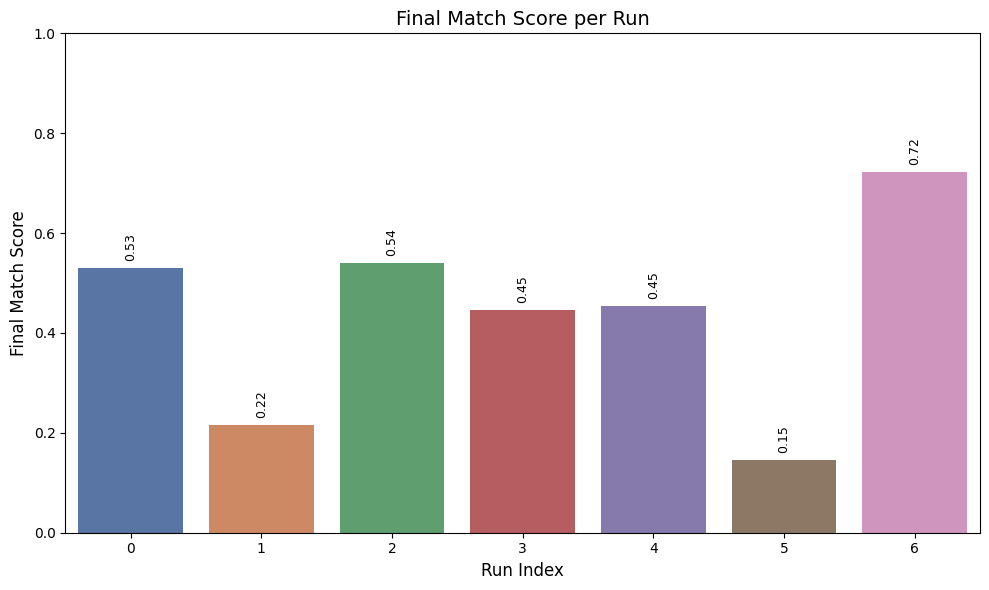

In [139]:
# Each scores by BERT model

plt.figure(figsize=(10, 6))

# Plot each bar individually
sns.barplot(data=df, x=df.index, y="final_match_score", dodge=False, palette="deep")

plt.title("Final Match Score per Run", fontsize=14)
plt.xlabel("Run Index", fontsize=12)
plt.ylabel("Final Match Score", fontsize=12)
plt.ylim(0, 1)

# Optional: annotate
for i, row in df.iterrows():
    plt.text(i, row["final_match_score"] + 0.02, f"{row['final_match_score']:.2f}", 
             ha="center", fontsize=9, rotation=90)

plt.tight_layout()
plt.show()

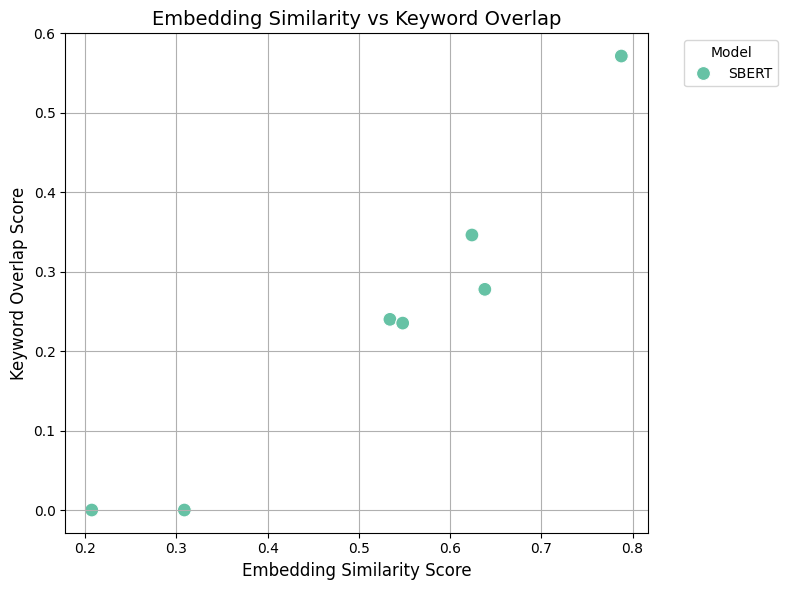

In [140]:
# Scatter: Embedding Score vs. Keyword Overlap

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="embedding_score", y="keyword_overlap", hue="model", palette="Set2", s=100)

plt.title("Embedding Similarity vs Keyword Overlap", fontsize=14)
plt.xlabel("Embedding Similarity Score", fontsize=12)
plt.ylabel("Keyword Overlap Score", fontsize=12)
plt.grid(True)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

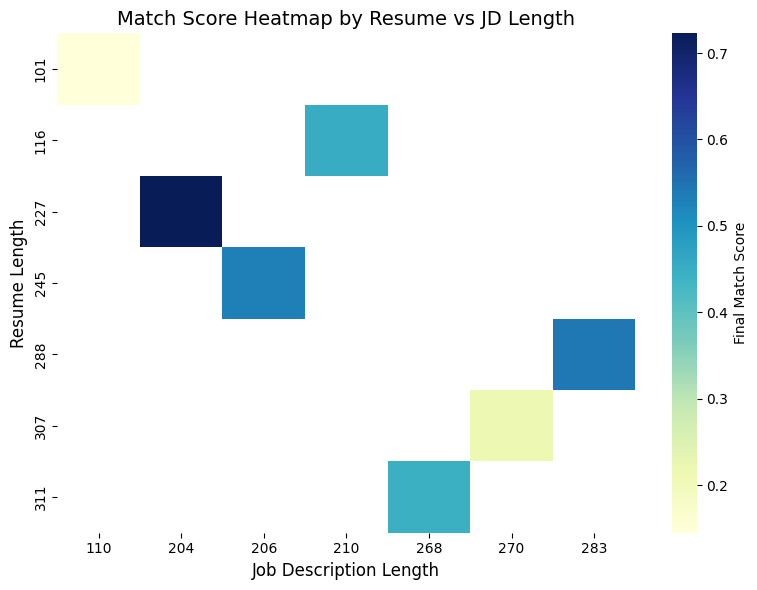

In [141]:
# Heatmap: Resume vs JD Length

plt.figure(figsize=(8, 6))
pivot = df.pivot_table(values="final_match_score", index="resume_length", columns="jd_length", aggfunc="mean")

sns.heatmap(pivot, cmap="YlGnBu", cbar_kws={'label': 'Final Match Score'})
plt.title("Match Score Heatmap by Resume vs JD Length", fontsize=14)
plt.xlabel("Job Description Length", fontsize=12)
plt.ylabel("Resume Length", fontsize=12)
plt.tight_layout()
plt.show()


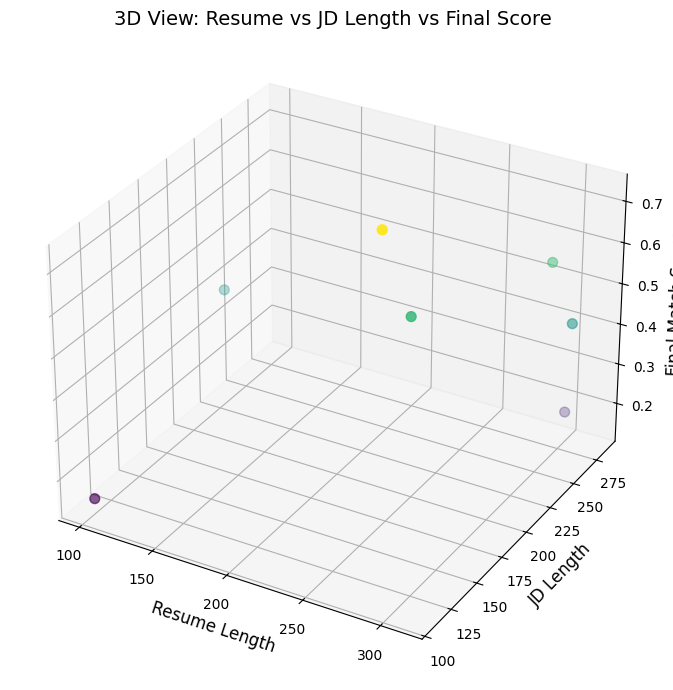

: 

In [ ]:
# 3D Scatter: Resume Len, JD Len, Match Score

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["resume_length"], df["jd_length"], df["final_match_score"], c=df["final_match_score"], cmap='viridis', s=50)

ax.set_title("3D View: Resume vs JD Length vs Final Score", fontsize=14)
ax.set_xlabel("Resume Length", fontsize=12)
ax.set_ylabel("JD Length", fontsize=12)
ax.set_zlabel("Final Match Score", fontsize=12)

plt.tight_layout()
plt.show()